# HackerSprint 

### Problem Statement :
**Commodity Price Forecasting using AI/ML.INFO:- Commodity price forecasting: use multivariate techniques to forecastfuture prices of steel, oil, etc using economic parameters. Any onecommodity considered is fine too.**


**DataSet : www.macrotrends.ne 2021's Crude Oil Production and Export**


* **Read The Read me file**

Collabrator :
* Ujwal Nikam 
* Rushikesh Adhav
* Kartik Patil
* Mayur Patil

In [2]:

# Basic Importing 

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving crudeoil.csv to crudeoil.csv


In [4]:
data = pd.read_csv("crudeoil.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0
3,2000-03-26,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0


In [5]:
# Inorder to Know the form of data 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6244 entries, 0 to 6243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6244 non-null   object 
 1   Open       5099 non-null   float64
 2   High       5099 non-null   float64
 3   Low        5099 non-null   float64
 4   Close      5099 non-null   float64
 5   Adj Close  5099 non-null   float64
 6   Volume     5099 non-null   float64
dtypes: float64(6), object(1)
memory usage: 341.6+ KB


In [6]:
# Mean and Standerd deviation 
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5.099000e+03
mean,61.420967,62.331418,60.443248,61.424156,61.424156,2.151295e+06
std,26.177958,26.410581,25.923062,26.174414,26.174414,2.355769e+07
min,1.400000,13.850000,-39.439999,-2.720000,-2.720000,0.000000e+00
25%,40.229999,40.975001,39.410000,40.185000,40.185000,1.025160e+05
50%,58.310001,59.040001,57.360001,58.139999,58.139999,2.459150e+05
75%,81.785000,82.860000,80.524998,81.769997,81.769997,3.917165e+05
max,145.190002,147.270004,142.490005,145.179993,145.179993,4.599355e+08


In [7]:
# Total Null values
data.isnull().sum()

Date            0
Open         1145
High         1145
Low          1145
Close        1145
Adj Close    1145
Volume       1145
dtype: int64

### From The Above observation We conclude that for the large sum of Missing data
* So We can't Fill the average Values as Deviation is too high and it will lead to wong model
* We cannot Keep the values Empty as it will Outlay the Prediction pattern 
* The best idea is to Drop the missing value as each value denotes is corrs to a Date And Continue with the rest data

In [8]:
data_missing = data.dropna()
data_missing.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# The New DataSet Is Data Missing 
data_missing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0
5,2000-03-28,27.60,27.870001,27.000000,27.080000,27.080000,39487.0


# Visualization 

**"Data will Talk with
You if you are
willing to Listine"**

* After cleaning the data we have to Viualize the data
* It helps us to find the Patterns And Prominant Features
* Observation : Closing Price highly depends on opening Price and Day-High  And leaase on Volume -units

Text(0.5, 0.98, 'Correlation matrix of features')

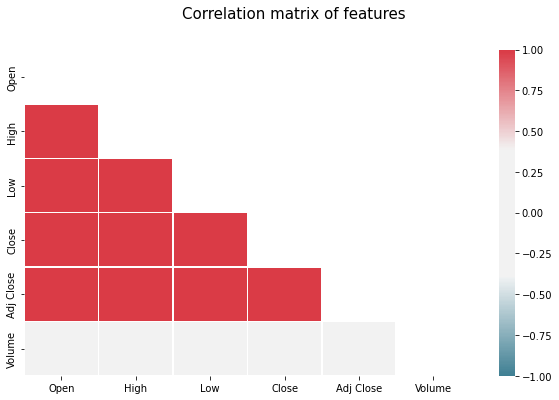

In [10]:


#In order to predict the Relations And How strong the relation is we use Correelation Metrix  

corr = data_missing.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)

<Figure size 1152x432 with 0 Axes>

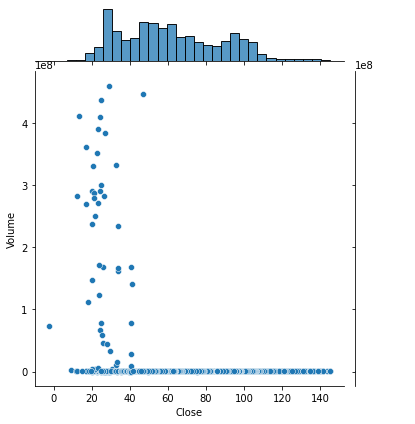

In [11]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
sns.jointplot(x=data_missing['Close'],y =data_missing['Volume'], data = data_missing)

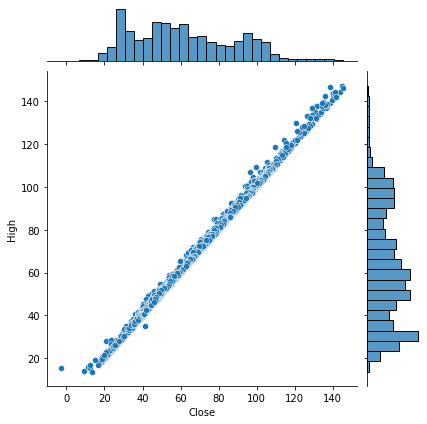

In [12]:
sns.jointplot(x=data_missing['Close'],y =data_missing['High'], data = data_missing)

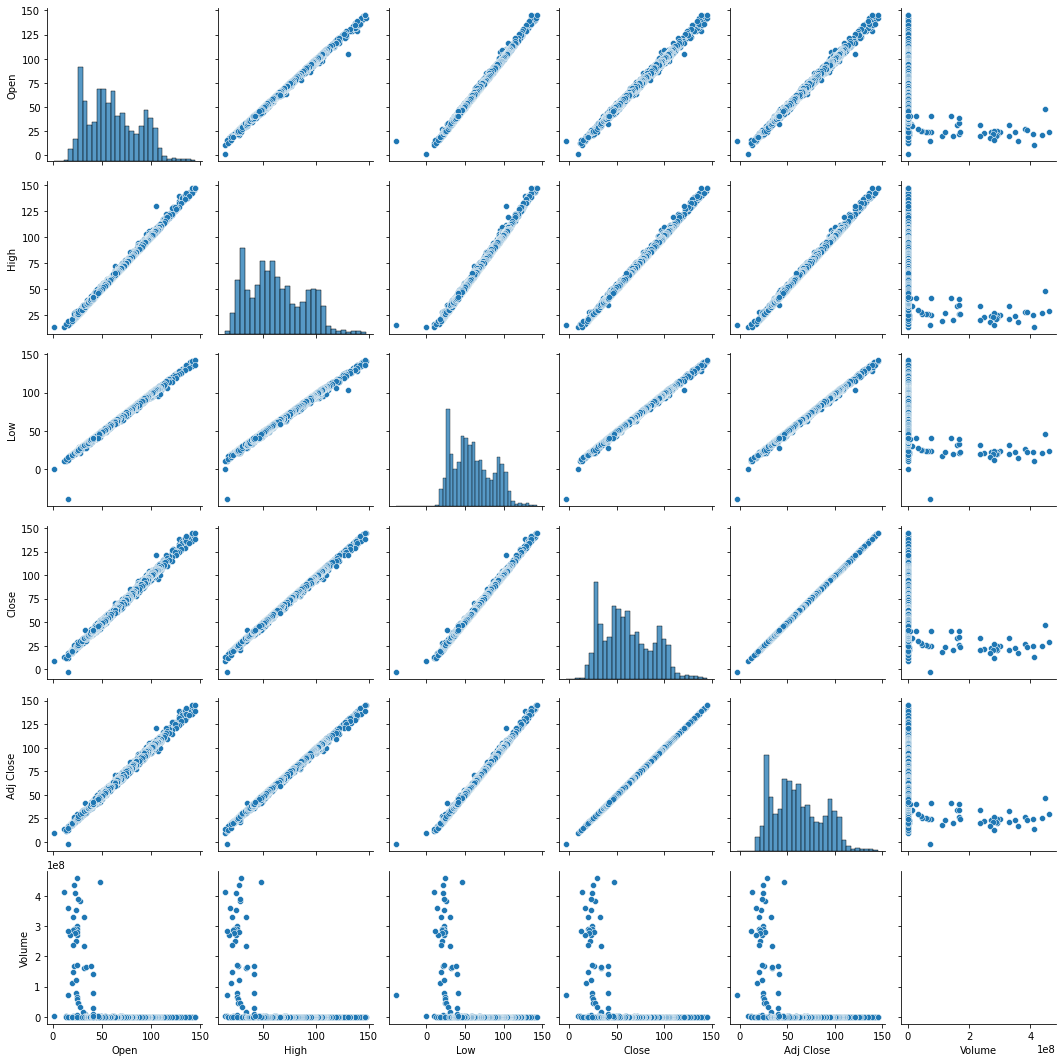

In [13]:
sns.pairplot(data_missing)

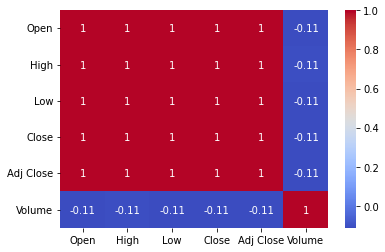

In [14]:
corr = data_missing.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

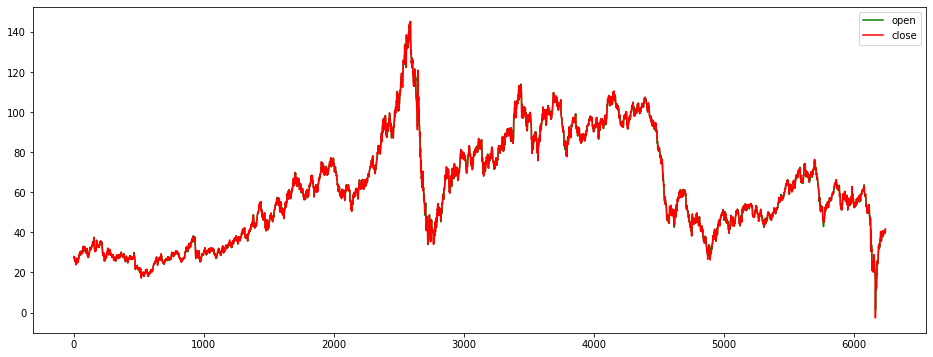

In [15]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.plot(data_missing['Open'],c='green',label='open')
plt.plot(data_missing['Close'],c='red',label='close')
plt.legend()

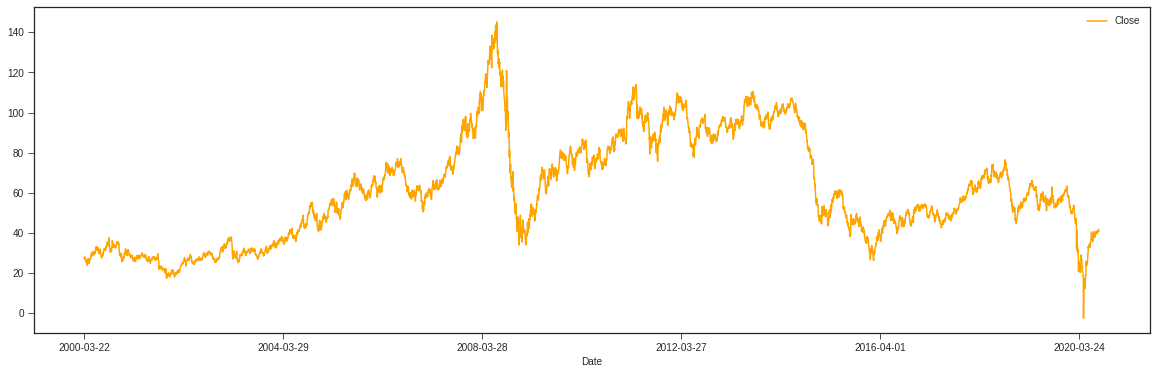

In [16]:
 plt.style.use('seaborn-ticks')

data_missing.plot(x= "Date",y= "Close",figsize = (20,6),color= "orange")

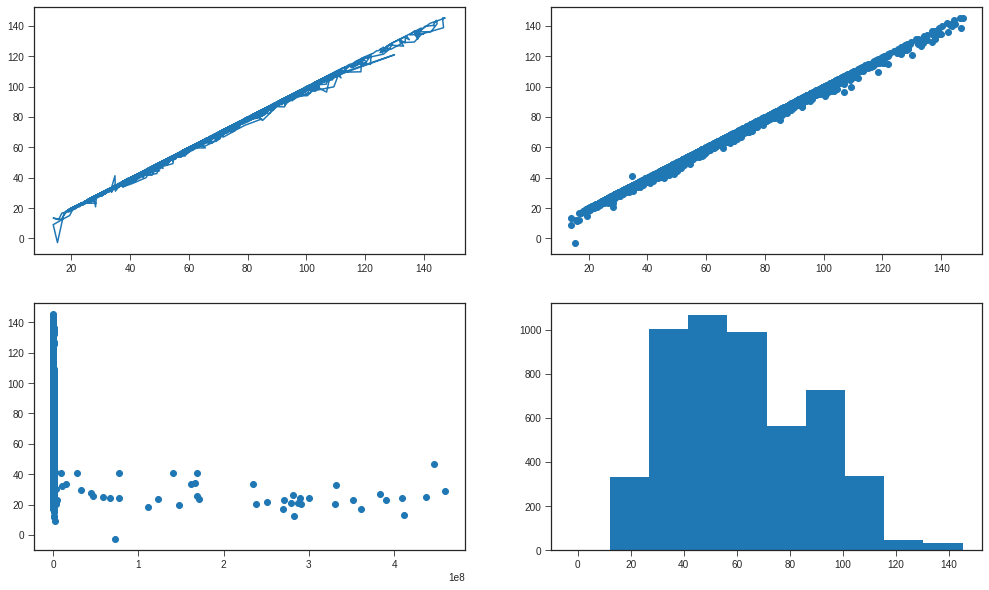

In [17]:
# subplots 

fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,            # fig, ax = rest same
                                          ncols=2,
                                          figsize = (17,10))

#plotting eaxh plot

ax1.plot(data_missing['High'],data_missing['Close'],label='regr line');                          # ax[0,0].plot(x1,np.exp(x1)); 
ax2.scatter(data_missing['High'],data_missing['Close']);                         # ax[1,0].scatter(x,np.exp(x));
ax3.scatter(data_missing['Volume'],data_missing['Close']);                         # ax[1,0].scatter(x,np.exp(x));
ax4.hist(data_missing["Close"]); 

In [18]:
X = data_missing[['High','Low','Open','Volume']].values
y = data_missing['Close'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(regressor.coef_)

[ 8.58915265e-01  5.64413521e-01 -4.25898034e-01  9.42244061e-11]


In [22]:
print(regressor.intercept_)

-0.06062551796711091


In [25]:
predicted = regressor.predict(X_test)

In [26]:
dataregr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [27]:
dataregr.head()

,Actual,Predicted
0,45.410000,46.347797
1,65.970001,65.548290
2,48.529999,48.229109
3,27.080000,27.361727
4,103.220001,102.682478


In [28]:
graph = dataregr.head(10)

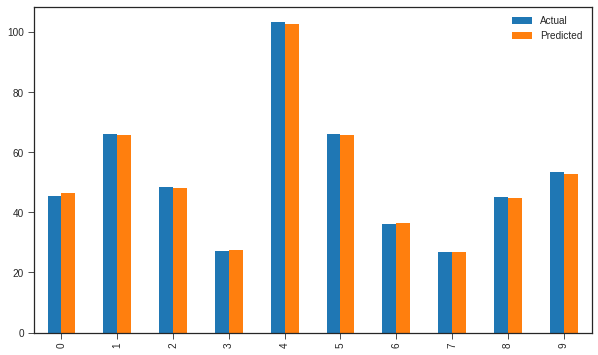

In [29]:
graph.plot(kind='bar',figsize=(10,6))

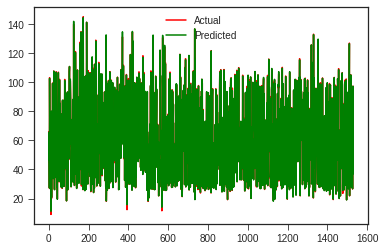

In [34]:
plt.plot(dataregr['Actual'],c='red',label='Actual')
plt.plot(dataregr['Predicted'],c='green',label='Predicted')
plt.legend()

In [35]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.4155879469700435
Mean Squared Error: 0.34586104966772546
Root Mean Squared Error: 0.5880995236078035


In [36]:
################## R square value is 0.9999 before implement of PCA ################

regressor.score(X_test,y_test)

0.9994952697166694